# Alarm

In [ ]:
from IPython.display import Audio

# progressbar

In [ ]:
import IPython
def progress(value, max=100):
    return IPython.display.HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

# Import modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow.keras import layers,Model
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
plt.style.use('seaborn-white')
plt.rcParams.update({'font.size':15})
tf.test.gpu_device_name()

'/device:GPU:0'

# Loading DB

In [ ]:
def load_db(label_name,typee):
    if label_name=="THREE_P1" or label_name=="THREE_P2" or label_name=="THREE_RESHAPE" or label_name=="THREE_UPSCALE":
        name=label_name+"_"+typee
    else:
        name=label_name
    Data=pd.read_csv("../datasets/DB_{}_SIGNALS.csv".format(name),index_col=0,header=0,compression='gzip')
    l=Data.columns.values.tolist()
    Data=Data.rename(columns={l[0]:"type"})
    del l[0]
    return Data,l,name

def to_df(Data,sample):
    temp=Data.iloc[:,int(sample)]
    temp=temp.loc[temp.notna()]
    s,t = [],[]
    for idx, ele in enumerate(temp.tolist()):
        if idx % 2 != 0:
            t.append(ele)
        else:
            s.append(ele)
    df1={'port':s,'time':t}
    df1=pd.DataFrame.from_dict(df1)
    return df1

# cut off

In [ ]:
def cut_off(series,cutsecond):
    for c,i in enumerate(series["port"]):
        i=float(i)
        if np.abs(i)<=0.001:
            temp=i
        else:
            data=series[c:]
            t=data['time'].iloc[0]
            #print("begining cut off index:{}  value:{} cutduration:{} threshold:{} remain samples:{}".format(c,i,t,temp,len(data)))
            break
    try:
        remain=cutsecond-float(t)
        end=float(data['time'].iloc[-1])
        d=data
    except:
        #print("****")
        remain=cutsecond
        end=float(series['time'].iloc[-1])
        d=series
    counter=-1
    for c,i in reversed(list(enumerate(d['time']))):
        if remain-(end-float(i))<=0:
            data=d[:counter]
            #print("ending cut off index:{}  value:{} cutduration:{} remain samples:{}".format(c,i,remain,len(data)))
            break
        counter=counter-1
    return data

# normalizeing

In [ ]:
def normalize(dataframe):
    dataframe["port"]=np.float64(dataframe["port"])/abs((np.float64(dataframe["port"]))).max()
    return dataframe

# resample

In [ ]:
from scipy import signal
def simple(samplerate,x):
    temp=signal.resample_poly(x, samplerate,len(x))
    return temp

## Choose DB

'ONE', 'TWO' , 'THREE_P1', 'THREE_P2' , 'THREE_RESHAPE' , 'THREE_UPSCALE'

In [ ]:
samplerate=400
label_name="THREE_UPSCALE"
typee="z"

data={}
freqdata={}
Data,l,name=load_db(label_name,typee)
progressbar = display(progress(0, len(l)), display_id=True)
for c,sample in enumerate(l):
    df1=to_df(Data,sample)
    #SR=len(df1['port'])/(float(df1['time'].to_numpy()[-1])*10**-9)
    #x,y,_=compute_fft(df1['port'],SR,False)
    #freqdata[c]=y

    df1=normalize(df1)
    df1=cut_off(df1,10)
    df1.reset_index(drop=True,inplace=True)



    data[c]=simple(samplerate,df1['port'])
    #data[c]=adventitious_differential(df1,4200,samplerate)

    """
    x,y,_=compute_fft(data[c],freq)
    freqdata={'x':x,'y':y}
    freqdata=pd.DataFrame(freqdata)
    freqdata.to_csv("{}freq_{}.csv".format(address,url[len(address):-4]),index=False, header=False)
    """
    progressbar.update(progress(c+1, len(l)))


#freqdata=pd.DataFrame.from_dict(freqdata,orient='index',columns=x)
dataframe=pd.DataFrame.from_dict(data, orient='index')
#freqdata.to_csv("{}freqs.csv".format(address),index=False)
Audio('alarm.mp3',autoplay=True)

# Shift labels

In [ ]:
df2=pd.read_csv("../datasets/DB_{}_LOCATONS.csv".format(label_name))
constant1,constant2=200,450
if label_name=="THREE_UPSCALE":
    constant1,constant2=450,900
dataframe['x']=pd.DataFrame(df2['X']+constant2)
if label_name=="THREE_RESHAPE":
    dataframe['y']=pd.DataFrame(df2['Y']+constant2)
else:
    dataframe['y']=pd.DataFrame(df2['Y']+constant1)
dataframe['z']=pd.DataFrame(df2['Z']+constant1)
y_valid=dataframe[['x','y','z']]
dataframe

0         1         2         3         4         5         6  \
0    0.000860  0.013328  0.092700  0.359808  0.773972  0.884122  0.397924   
1    0.000503  0.003422  0.010373  0.027849  0.065698  0.137422  0.253345   
2    0.000974  0.004636  0.013955  0.037831  0.087948  0.172338  0.276558   
3   -0.000658 -0.008284 -0.043683 -0.134093 -0.226434 -0.167944  0.059954   
4    0.000849  0.005050  0.015297  0.032569  0.062887  0.143227  0.272258   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.000791  0.006393  0.024355  0.061635  0.090595  0.040914 -0.098344   
996  0.000952  0.006786  0.006020 -0.066410 -0.232752 -0.263373 -0.009278   
997  0.000675  0.005454  0.019542  0.048829  0.075071  0.035906 -0.121824   
998  0.000627  0.006329  0.031025  0.104946  0.237056  0.315332  0.097617   
999 -0.000940 -0.008010 -0.038575 -0.123814 -0.251440 -0.284830 -0.056736   

            7         8         9  ...       393       394       395  \
0   -0.356654 -0.926964 -0.870934  ...  0.046747  0.064954  0.141558   
1    0.408466  0.567658  0.661392  ... -0.363098 -0.440358 -0.272666   
2    0.344552  0.284001  0.021818  ...  0.281268  0.234669  0.075844   
3    0.300989  0.452960  0.345908  ...  0.054357  0.099846  0.052014   
4    0.284811  0.045284 -0.248842  ...  0.528768  0.620404  0.264565   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.191309 -0.125840  0.018825  ...  0.080384  0.178397  0.177393   
996  0.274276  0.389648  0.235557  ... -0.031965  0.112785  0.158851   
997 -0.311850 -0.315417 -0.038837  ...  0.058707 -0.165486 -0.283484   
998 -0.475700 -0.966969 -0.794950  ... -0.120720 -0.025382  0.125835   
999  0.379542  0.760431  0.823753  ... -0.114533  0.033322  0.128960   

          396       397       398       399            x           y  \
0    0.118614  0.052197  0.022272  0.078717  1600.186221  780.900357   
1    0.040823  0.349352  0.476656  0.409254  1547.653727  522.458703   
2   -0.129251 -0.272829 -0.285262 -0.157817  1074.709419  563.494303   
3   -0.048878 -0.089448 -0.018330  0.086756  1178.553858  100.032474   
4   -0.228447 -0.417595 -0.205846  0.242952  1647.025189  192.324801   
..        ...       ...       ...       ...          ...         ...   
995 -0.124408 -0.506084 -0.680736 -0.231023  1588.549939  874.289893   
996  0.045190 -0.122911 -0.118965 -0.063649  1402.735170  664.841347   
997 -0.159515  0.143641  0.377666  0.361895    32.910993   12.471819   
998  0.201679  0.157383  0.042079  0.004710  1387.371142  611.209499   
999  0.150139  0.121650  0.071585 -0.014725  1234.437127  436.952458   

              z  
0     31.246515  
1    102.995658  
2     68.962600  
3    547.042210  
4    210.119267  
..          ...  
995  886.463699  
996  676.497529  
997  581.877918  
998  794.578809  
999  460.700941  

[1000 rows x 403 columns]

In [ ]:
dataframe.to_csv("{}_data_sample_{}.csv".format(name,samplerate),index=False, header=False)

# Load preprocessed Database

In [ ]:
samplerate=400
label_name="THREE_P1" # 'ONE' , 'TWO' , 'THREE_P1' , 'THREE_P2' , 'THREE_RESHAPE' 'THREE_UPSCALE'
typee="z"
if label_name=="THREE_P1" or label_name=="THREE_P2" or label_name=="THREE_RESHAPE" or label_name=="THREE_UPSCALE":
    name=label_name+"_"+typee
else:
    name=label_name
dataframe=pd.read_csv ("../../{}_data_sample_{}.csv".format(name,samplerate),header=None)
dataframe['x']=dataframe[samplerate]
dataframe['y']=dataframe[samplerate+1]
dataframe['z']=dataframe[samplerate+2]
dataframe=dataframe.drop([samplerate, samplerate+1,samplerate+2], axis=1)
dataframe

0         1         2         3         4         5         6  \
0    0.000821  0.006153  0.021171  0.047599  0.056336 -0.007630 -0.135515   
1    0.000748  0.006988  0.034673  0.115750  0.249063  0.307319  0.083685   
2   -0.000632 -0.003554 -0.009875 -0.024966 -0.056238 -0.113654 -0.204328   
3    0.000807  0.005758  0.020024  0.051881  0.099189  0.143922  0.171137   
4   -0.000826 -0.004115 -0.012463 -0.033832 -0.079068 -0.157139 -0.259662   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.000697 -0.005240 -0.020326 -0.057238 -0.109673 -0.122078 -0.012408   
996  0.000674  0.001807  0.002742  0.004399  0.006677  0.009983  0.014444   
997 -0.000904 -0.003873 -0.010589 -0.025735 -0.051754 -0.082861 -0.095192   
998 -0.001052 -0.005567 -0.019739 -0.056486 -0.134918 -0.268624 -0.381513   
999  0.000620  0.002011  0.003464  0.006209  0.010553  0.017543  0.028219   

            7         8         9  ...       393       394       395  \
0   -0.196292 -0.091303  0.083387  ...  0.149451 -0.118059 -0.342152   
1   -0.423991 -0.865461 -0.827010  ...  0.017824  0.049605  0.062173   
2   -0.323105 -0.440534 -0.498480  ... -0.194567 -0.016212  0.203971   
3    0.193773  0.226152  0.233462  ...  0.572073  0.403760  0.030942   
4   -0.343416 -0.328935 -0.137599  ...  0.305333  0.108010 -0.097081   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.204135  0.350378  0.260351  ... -0.136350 -0.255555 -0.228567   
996  0.020345  0.027775  0.036735  ... -0.123895 -0.234984 -0.332530   
997 -0.048083  0.090696  0.298919  ... -0.309030 -0.219423 -0.065602   
998 -0.254111  0.207768  0.708756  ... -0.052033  0.305694  0.568468   
999  0.044109  0.066893  0.098475  ...  0.780438  0.747075  0.741154   

          396       397       398       399           x           y  \
0   -0.283599  0.046976  0.331960  0.331793  199.422126  306.504295   
1    0.000233 -0.001538  0.047721  0.028557  183.563545   53.980370   
2    0.336645  0.249513  0.056416 -0.245580  561.689375   25.968271   
3   -0.479170 -0.718082 -0.564288  0.110261  652.684604  268.977981   
4   -0.194160 -0.075583  0.136513  0.354046  750.927769  192.882770   
..        ...       ...       ...       ...         ...         ...   
995 -0.182985 -0.078333  0.033753  0.294017  107.218736  307.380846   
996 -0.384615 -0.443787 -0.434121 -0.492053   38.823391  313.745155   
997  0.079766  0.140701  0.113788 -0.022611  149.002363   11.567237   
998  0.452947  0.071583 -0.216693 -0.348791  459.995313   20.976494   
999  0.708714  0.742509  0.698499  0.819049  780.541217  129.367594   

              z  
0    319.874650  
1    252.091907  
2    393.119059  
3     63.299895  
4    246.670493  
..          ...  
995  151.382965  
996  189.907332  
997   42.504688  
998  353.513651  
999  178.041293  

[1000 rows x 403 columns]

# Plot for test

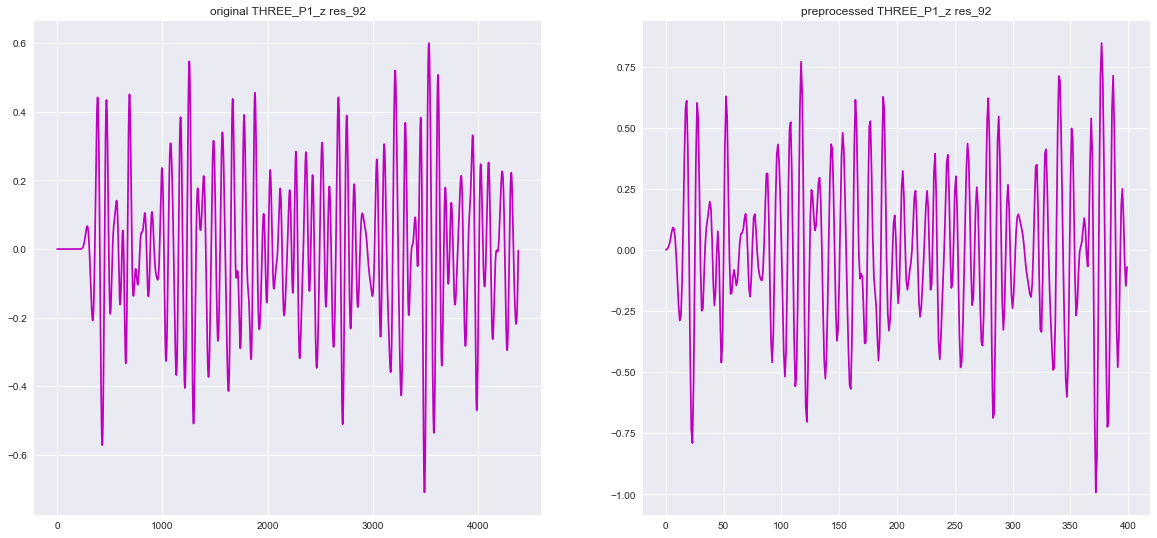

In [ ]:
sample=92

Data,l,name=load_db(label_name,typee)
df1=to_df(Data,sample)

plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size':15})
plt.subplot(2,2,1)
plt.title("original {} res_{}".format(name,sample))
plt.plot(df1['port'],color = 'm')



plt.subplot(2,2,2)
plt.title("preprocessed {} res_{}".format(name,sample))
plt.plot(dataframe.iloc[sample-1,:samplerate],color = 'm')
plt.savefig('{}_res_{}.png'.format(name,sample))

# 3d plot

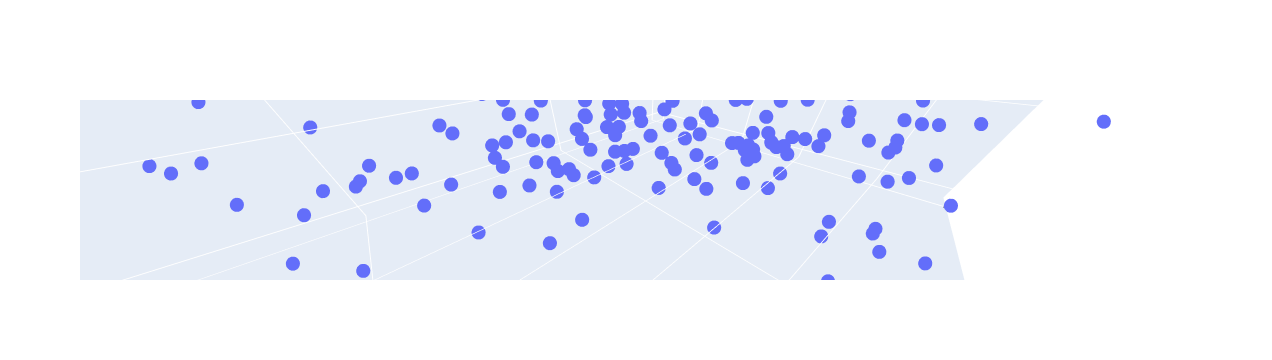

In [ ]:
import plotly.graph_objects as go
import numpy as np
fig = go.Figure(data=[go.Scatter3d(x=dataframe["x"], y=dataframe["y"], z=dataframe["z"],mode='markers')])
fig.show()

In [ ]:
def pearson_loss(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), 1)
    y_pred = K.clip(y_pred, K.epsilon(), 1)
    # reshape stage
    y_true = K.reshape(y_true, shape=(-1, 224 * 224 * 3))
    y_pred = K.reshape(y_pred, shape=(-1, 224 * 224 * 3))
    # normalizing stage - setting a 0 mean.
    y_true -= y_true.mean(axis=-1)
    y_pred -= y_pred.mean(axis=-1)
    # normalizing stage - setting a 1 variance
    y_true = K.l2_normalize(y_true, axis=-1)
    y_pred = K.l2_normalize(y_pred, axis=-1)
    # final result
    pearson_correlation = K.sum(y_true * y_pred, axis=-1)
    return pearson_correlation


# split labels

In [ ]:
#create labels
y = pd.DataFrame({'x':dataframe['x'],
              'y': dataframe['y'],
              'z': dataframe['z']})
dataframe=dataframe.drop(['x', 'y','z'], axis=1)
y

x           y           z
0    1600.186221  780.900357   31.246515
1    1547.653727  522.458703  102.995658
2    1074.709419  563.494303   68.962600
3    1178.553858  100.032474  547.042210
4    1647.025189  192.324801  210.119267
..           ...         ...         ...
995  1588.549939  874.289893  886.463699
996  1402.735170  664.841347  676.497529
997    32.910993   12.471819  581.877918
998  1387.371142  611.209499  794.578809
999  1234.437127  436.952458  460.700941

[1000 rows x 3 columns]

## train 1D data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataframe, y,random_state=11, test_size=0.2,shuffle=True)
X_train=x_train.iloc[:,:].values
X_test=x_test.iloc[:,:].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

# 1D model

In [ ]:
model_name_to_save='final_case_study_three_upscale_z'
samplerate=400
model_name_to_save='../logs/'+model_name_to_save
model_name_to_load=model_name_to_save

import os
from pathlib import Path
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

model_name_to_save='1D_'+model_name_to_save
his_file = Path(model_name_to_save)
if his_file.exists():
    print('folder exist')
    his_file = Path("{}/history.csv".format(model_name_to_save))
    if his_file.exists():
      os.remove("{}/history.csv".format(model_name_to_save))
else:
    os.mkdir(model_name_to_save)

data = [x_test, y_test]
testdataframe=pd.concat(data, axis=1)
testdataframe.to_csv("{}/test_{}.csv".format(model_name_to_save,samplerate),index=False)
data = [x_train, y_train]
traindataframe=pd.concat(data, axis=1)
traindataframe.to_csv("{}/train_{}.csv".format(model_name_to_save,samplerate),index=False)

im_shape=(X_train.shape[1],1)
freq_shape=(1)

inputdata=tf.keras.Input(im_shape)
inputfreq=tf.keras.Input(freq_shape)

config1={'model':'cnn','av1':4,'av2':2,'unit1': 64, 'unit2': 256, 'kernel1': 7, 'kernel2': 10,'drop1':0.1,'drop2':0.2, 'dense_size1': 512, 'dense_size2': 256, 'dense_size3': 512,"r1":0.3,"r2":0.3,"r3":0.4,"r4":0,"r5":0.3}  #new
config2={'model':'snn','dense_size1': 512, 'dense_size2': 512, 'dense_size3': 512,"r3":0.5,"r4":0,"r5":0.4}

def build_1D_model(config):
    if config['model']=='cnn':
        x=layers.GaussianNoise(stddev=0.2)(inputdata) #layer 1
        x=layers.Convolution1D(config['unit1'], (config['kernel1']), activation="relu",kernel_regularizer=l2(config['r1']), input_shape=im_shape )(x)# 7 0.005
        x=layers.AveragePooling1D((config['av1']))(x)
        x=layers.Dropout(config['drop1'])(x)

        x=layers.Convolution1D(config['unit2'], (config['kernel2']),kernel_regularizer=l2(config['r2']), activation="relu" )(x) #layer 2 #256 3 0.1
        x=layers.AveragePooling1D((config['av2']))(x)
        x=layers.Dropout(config['drop2'])(x)

        x=layers.Flatten()(x)
    else:
        x=layers.Flatten()(inputdata)
    x=layers.Dense(config['dense_size1'],kernel_regularizer=l2(config['r3']), activation="relu")(x)
    x=layers.Dense(config['dense_size2'],kernel_regularizer=l2(config['r4']), activation="relu")(x)
    x=layers.Dense(config['dense_size3'],kernel_regularizer=l2(config['r5']), activation="relu")(x)
    preoutput=layers.Dense(3)(x)

    model=Model(inputs=inputdata,outputs=preoutput,name=model_name_to_save)


    loss_fn=tf.keras.losses.MeanSquaredError(reduction="auto", name="mse")
    metric=[tf.keras.metrics.MeanSquaredError()]
    #loss_fn=pearson_loss() #custom

    model.compile(optimizer='nadam', loss=loss_fn ,metrics = metric)
    return model

model=build_1D_model(config1)
callbacks = [#EarlyStopping(monitor='val_loss', patience=10),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,min_lr=0.001,verbose=1),
             tf.keras.callbacks.CSVLogger("{}/history.csv".format(model_name_to_save), append=True),
             ModelCheckpoint(filepath='{}/best_model.h5'.format(model_name_to_save), monitor='val_loss', save_best_only=True)]
model.summary()

Model: "1D_final_case_study_three_upscale_z"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 400, 1)]          0         
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 400, 1)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 394, 64)           512       
_________________________________________________________________
average_pooling1d_4 (Average (None, 98, 64)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 98, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 89, 256)           164096    
_________________________________________________________________
average_pooling1d_5 (Average (N

In [ ]:
history=model.fit(X_train,y_train,epochs=200, callbacks=callbacks, batch_size=10,validation_data=(X_test,y_test))
Audio('alarm.mp3',autoplay=True)

# K-FOLD cross validation

In [ ]:
from sklearn.model_selection import KFold
import math
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)
fold_no = 1
acc_per_fold,loss_per_fold,corelations=[],[],[]
for train, test in kfold.split(inputs, targets):
    model=build_1D_model(config2)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=10,
              epochs=100)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    c,c2,index=0,0,0
    errors={}
    validation={}
    for i in model.predict(inputs[test]):
        x,y,z=i
        x2,y2,z2=targets[test][c2]
        validation[c]=[x,y,z,index,'predict']
        c+=1
        validation[c]=[x2,y2,z2,index,'real']
        c+=1
        c2+=1
        index+=1
        errors[c]=math.sqrt((1/3)*((x2-x)**2+(y2-y)**2+(z2-z)**2))

    validation=pd.DataFrame.from_dict(validation, orient='index',columns=['x','y','z','index','kind'])
    x=np.corrcoef(validation[validation['kind'] == 'predict']['x'],validation[validation['kind'] == 'real']['x'])[0][1]
    y=np.corrcoef(validation[validation['kind'] == 'predict']['y'],validation[validation['kind'] == 'real']['y'])[0][1]
    z=np.corrcoef(validation[validation['kind'] == 'predict']['z'],validation[validation['kind'] == 'real']['z'])[0][1]
    print("R:\n",x,y,z)
    corelations.append([x,y,z])
    # Increase fold number
    fold_no = fold_no + 1

Audio('alarm.mp3',autoplay=True)

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - MSE: {acc_per_fold[i]}%')
    print(f'> R:{corelations[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> MSE: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> R: {np.mean(corelations)} (+- {np.std(corelations)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 11433.837890625 - MSE: 10042.265625%
> R:[0.9696407182394786, 0.48377705315889113, 0.4295973877885538]
------------------------------------------------------------------------
> Fold 2 - Loss: 10122.7470703125 - MSE: 8743.0810546875%
> R:[0.9659383385683495, 0.48556625156907557, 0.5668280135803098]
------------------------------------------------------------------------
> Fold 3 - Loss: 8266.4677734375 - MSE: 6864.9326171875%
> R:[0.9811652113278942, 0.6482988406204699, 0.5919294591649357]
------------------------------------------------------------------------
> Fold 4 - Loss: 10105.1962890625 - MSE: 8703.568359375%
> R:[0.9633396932024848, 0.513907571349001, 0.5479065479076851]
------------------------------------------------------------------------
> Fold 5 - Loss: 11287.8359375 - MSE: 9983.837890625%
> R:[0

# grid search 1D

In [ ]:
def build_model(hp):
    unit1 = hp.Choice('unit1', values=[64,128,256,512,1024])
    unit12 = hp.Choice('kernel', values=[2,4,5,6,7,8,9,10])
    unit13 = hp.Choice('pol', values=[2,4,5,6,7,8,9,10])
    unit14 = hp.Choice('drop', values=[0.1,0.2,0.3])

    model = tf.keras.Sequential()
    model.add( layers.InputLayer(input_shape=im_shape))

    model.add(
            layers.GaussianNoise(stddev=0.2)
          )

    model.add(
        layers.Convolution1D(64, (7), activation="relu",kernel_regularizer=l2(0.3), input_shape=im_shape )
    )
    model.add(
          layers.AveragePooling1D((4))
    )
    model.add(
          layers.Dropout(0.1)
          )

    model.add(
        layers.Convolution1D(256, (10),kernel_regularizer=l2(0.3), activation="relu" )
    )
    model.add(
          layers.AveragePooling1D((2))
    )
    model.add(
        layers.Dropout(0.2)
    )

    model.add(
        layers.Convolution1D(unit1, (unit12),kernel_regularizer=l2(0.3), activation="relu" )
    )
    model.add(
          layers.AveragePooling1D((unit13))
    )
    model.add(
        layers.Dropout(unit14)
    )

    model.add(
      layers.Flatten()
    )
    model.add(
        layers.Dense(512,kernel_regularizer=l2(0.4), activation="relu")
    )
    model.add(
        layers.Dense(256,kernel_regularizer=l2(0.0), activation="relu")
    )
    model.add(
        layers.Dense(512,kernel_regularizer=l2(0.3), activation="relu")
    )
    model.add(
        layers.Dense(3)
    )
    model.compile(
        optimizer='nadam', loss=tf.keras.losses.MeanSquaredError(reduction="auto", name="mse") ,metrics = [tf.keras.metrics.MeanSquaredError()]
    )
    return model

callbacks = [#EarlyStopping(monitor='val_loss', patience=10),
             tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,min_lr=0.001,verbose=1),
             #tf.keras.callbacks.CSVLogger("{}/history.csv".format(model_name_to_save), append=True),
            # ModelCheckpoint(filepath='{}/best_model.h5'.format(model_name_to_save), monitor='val_loss', save_best_only=True)
]

In [ ]:
from keras_tuner import RandomSearch
trials=15
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=trials,
    executions_per_trial=2,
    overwrite=False,
    directory="1d_tune",
    project_name="tuned_model",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
unit1 (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256, 512, 1024], 'ordered': True}
kernel (Choice)
{'default': 2, 'conditions': [], 'values': [2, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
pol (Choice)
{'default': 2, 'conditions': [], 'values': [2, 4, 5, 6, 7, 8, 9, 10], 'ordered': True}
drop (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train, epochs=20,batch_size=10,callbacks=callbacks, validation_data=(X_test, y_test))
Audio('alarm.mp3',autoplay=True)

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'av1': 4, 'av2': 2}


In [ ]:
trials=15
tuner.results_summary(trials)

Results summary
Results in 1d_tune\tuned_model
Showing 15 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
av1: 4
av2: 2
Score: 5222.003662109375
Trial summary
Hyperparameters:
av1: 4
av2: 4
Score: 5224.31103515625
Trial summary
Hyperparameters:
av1: 5
av2: 3
Score: 5643.284423828125
Trial summary
Hyperparameters:
av1: 6
av2: 2
Score: 5968.892822265625
Trial summary
Hyperparameters:
av1: 2
av2: 5
Score: 6032.020751953125
Trial summary
Hyperparameters:
av1: 2
av2: 2
Score: 6136.34375
Trial summary
Hyperparameters:
av1: 7
av2: 2
Score: 6178.314453125
Trial summary
Hyperparameters:
av1: 5
av2: 4
Score: 6283.4765625
Trial summary
Hyperparameters:
av1: 3
av2: 7
Score: 6535.24072265625
Trial summary
Hyperparameters:
av1: 1
av2: 4
Score: 6844.954345703125
Trial summary
Hyperparameters:
av1: 1
av2: 3
Score: 6981.42529296875
Trial summary
Hyperparameters:
av1: 1
av2: 5
Score: 7010.64453125
Trial summary
Hyperparameters:
av1: 6
av2: 7
Score: 86

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
loss, accuracy = best_model.evaluate(X_test, y_test)

# save model architecture

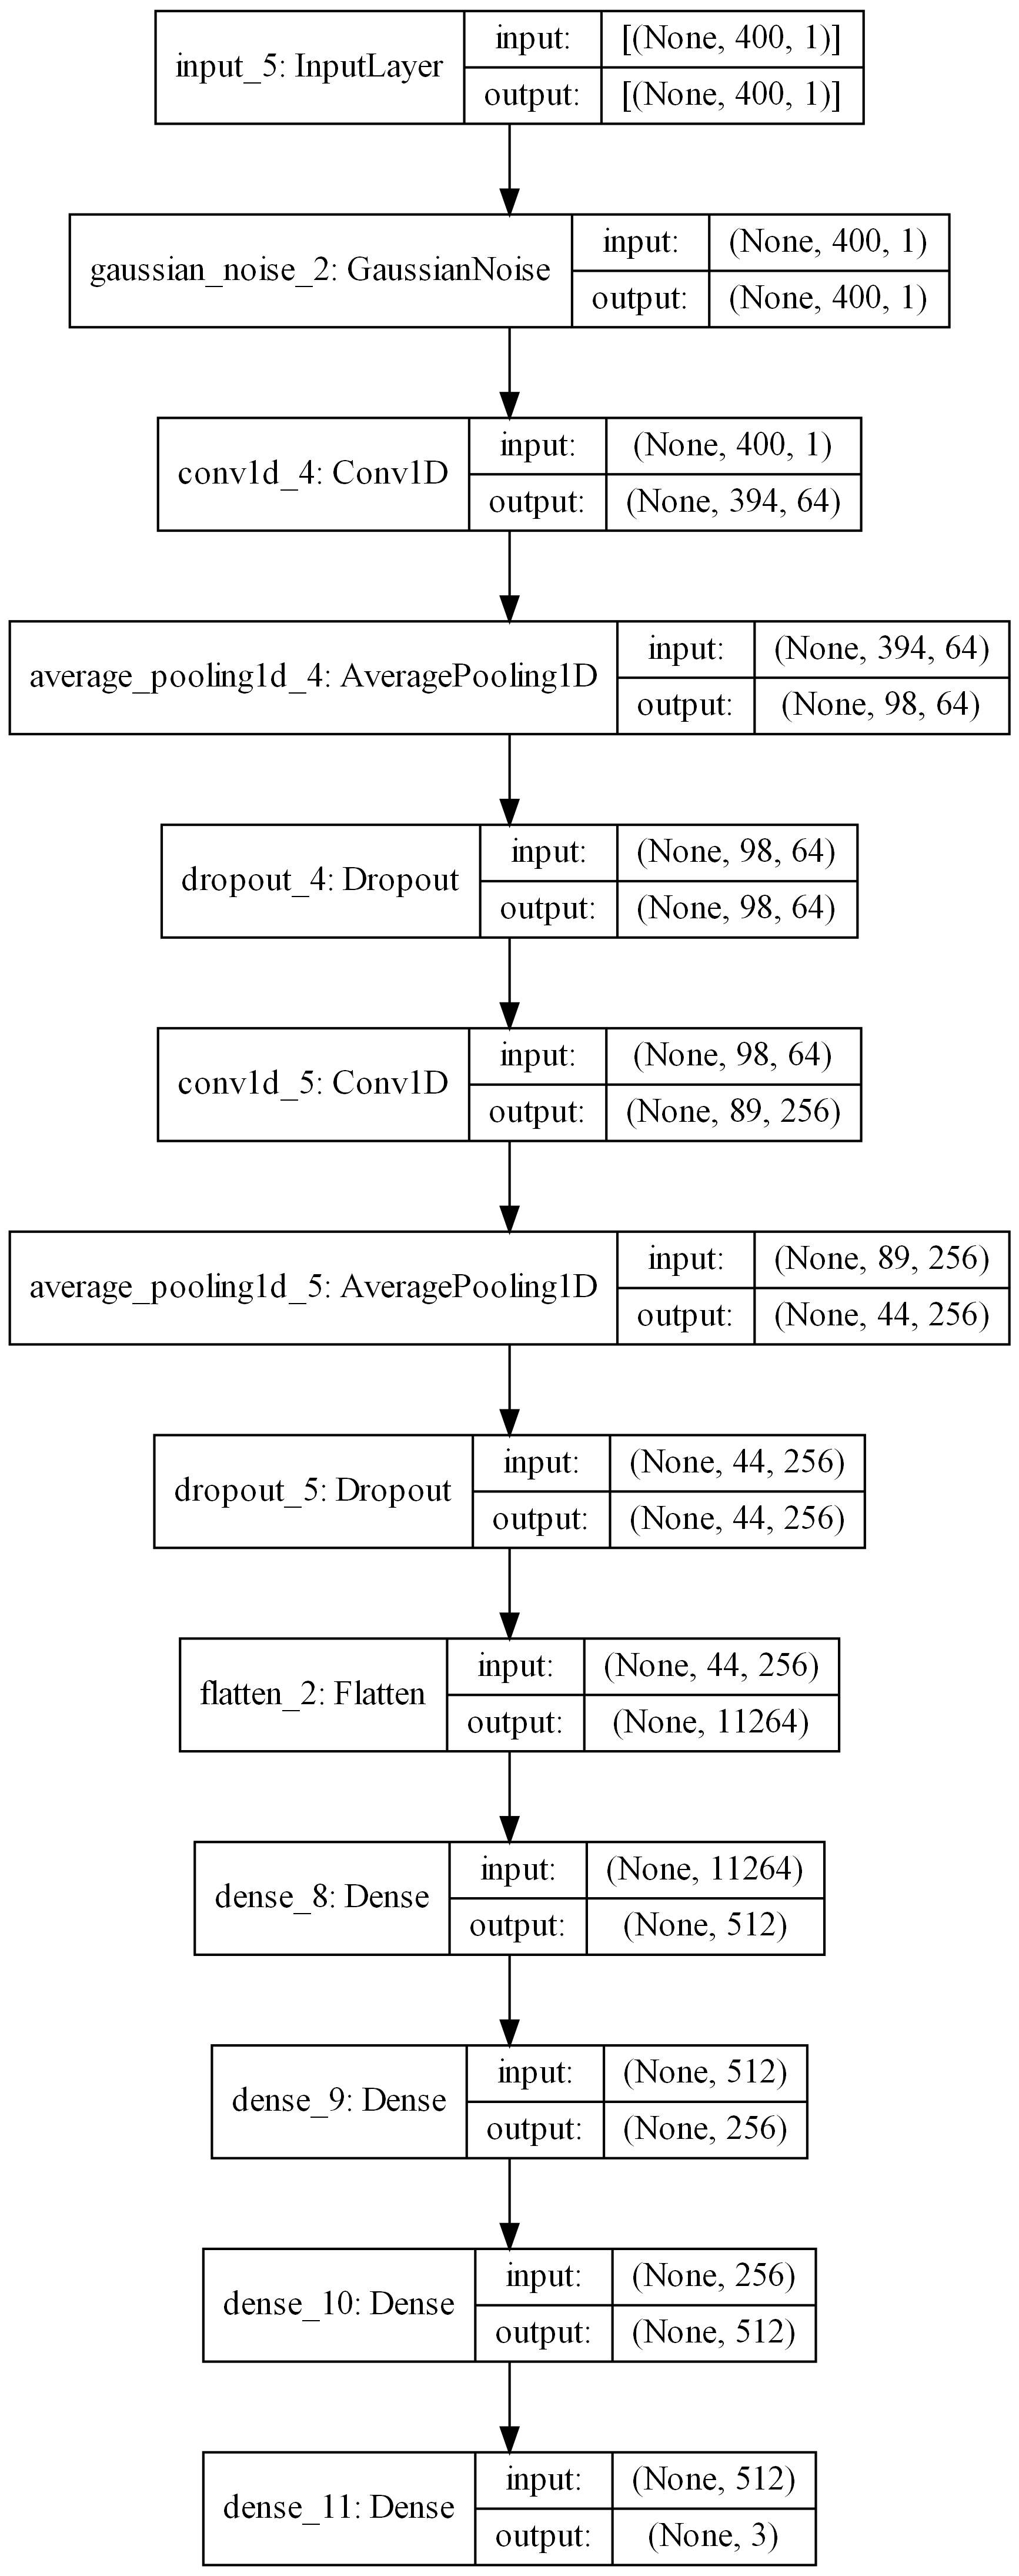

In [ ]:
tf.keras.utils.plot_model(model,to_file="{}/architecture.png".format(model_name_to_save),show_layer_names=True,dpi=300,show_shapes=True,expand_nested=True)

# plot history

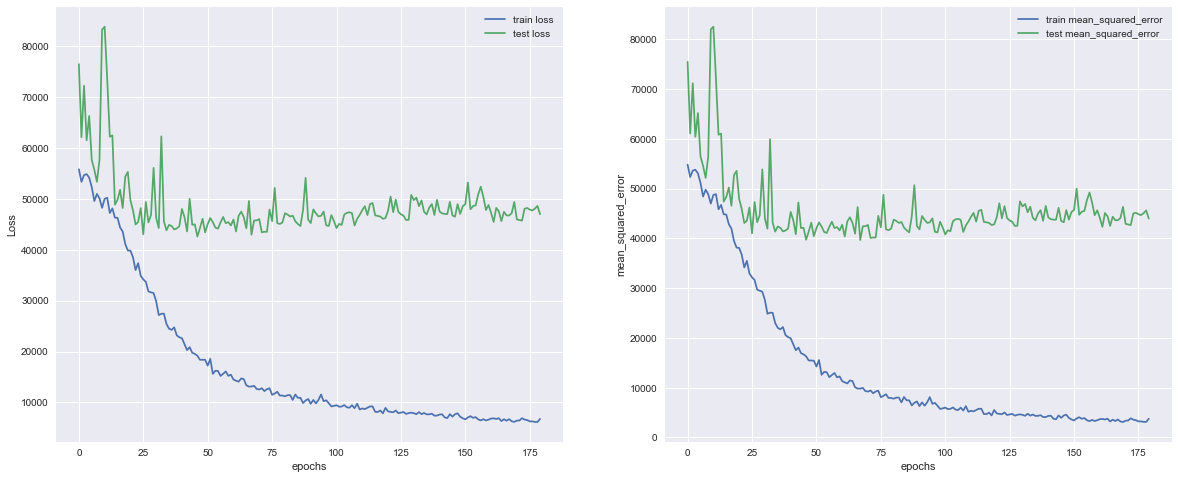

In [ ]:
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'][20:], label = 'train loss')
plt.plot(history.history['val_loss'][20:], label = 'test loss')
try:
    plt.plot(history.history['X_loss'][20:], label = 'X train loss')
    plt.plot(history.history['val_X_loss'][20:], label = 'X test loss')
    plt.plot(history.history['Y_loss'][20:], label = 'Y train loss')
    plt.plot(history.history['val_Y_loss'][20:], label = 'Y test loss')
    plt.plot(history.history['Z_loss'][20:], label = 'Z train loss')
    plt.plot(history.history['val_Z_loss'][20:], label = 'Z test loss')
except:
    pass
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("epochs")
try:
    plt.ylabel('mean_squared_error')
    plt.plot(history.history['X_mean_squared_error'][20:], label = 'X train mean_squared_error')
    plt.plot(history.history['val_X_mean_squared_error'][20:], label = 'X test mean_squared_error' )
    plt.plot(history.history['Y_mean_squared_error'][20:], label = 'Y train mean_squared_error')
    plt.plot(history.history['val_Y_mean_squared_error'][20:], label = 'Y test mean_squared_error' )
    plt.plot(history.history['Z_mean_squared_error'][20:], label = 'Z train mean_squared_error')
    plt.plot(history.history['val_Z_mean_squared_error'][20:], label = 'Z test mean_squared_error' )
except:
    plt.ylabel('mean_squared_error')
    plt.plot(history.history['mean_squared_error'][20:], label = 'train mean_squared_error')
    plt.plot(history.history['val_mean_squared_error'][20:], label = 'test mean_squared_error' )
plt.grid(True)
plt.legend()
plt.savefig('{}/graph.png'.format(model_name_to_save))

# evaluate on test data

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=4,verbose=2)
print("Test loss:", results[0])
print("Test mean_squared_error:", results[1])

Evaluate on test data
50/50 - 0s - loss: 61274.9492 - mean_squared_error: 58873.1016
Test loss: 61274.94921875
Test mean_squared_error: 58873.1015625


# save model

In [ ]:
model.save_weights('{}/weights_only.h5'.format(model_name_to_save)) #1 reserved
model.save('{}/model.h5'.format(model_name_to_save),include_optimizer=True,overwrite=True)

# save hyperparameters

In [ ]:
model_config = model.get_config()['layers']
text=''
for layer in model_config:
    classname=layer['class_name']
    try:
        name=layer['name']
    except:
        name=layer['config']['name']
    config = layer['config']
    print('-'*20,'(',classname,'\t',name,')','-'*20)
    text+='-'*20+'('+classname+'\t'+name+')'+'-'*20+'\n'
    for key,value in config.items():
        if value==None or key=='name' or key=='trainable' or key=='dtype':
            continue
        print(key,'\t',value)
        text+=key+'\t'+str(value)+'\n'
f=open('{}/hyperparameters.txt'.format(model_name_to_save),'w')
f.write(text)
f.close()

-------------------- ( InputLayer 	 input_5 ) --------------------
batch_input_shape 	 (None, 400, 1)
sparse 	 False
ragged 	 False
-------------------- ( GaussianNoise 	 gaussian_noise_2 ) --------------------
stddev 	 0.2
-------------------- ( Conv1D 	 conv1d_4 ) --------------------
batch_input_shape 	 (None, 400, 1)
filters 	 64
kernel_size 	 (7,)
strides 	 (1,)
padding 	 valid
data_format 	 channels_last
dilation_rate 	 (1,)
groups 	 1
activation 	 relu
use_bias 	 True
kernel_initializer 	 {'class_name': 'GlorotUniform', 'config': {'seed': None}}
bias_initializer 	 {'class_name': 'Zeros', 'config': {}}
kernel_regularizer 	 {'class_name': 'L2', 'config': {'l2': 0.30000001192092896}}
-------------------- ( AveragePooling1D 	 average_pooling1d_4 ) --------------------
strides 	 (4,)
pool_size 	 (4,)
padding 	 valid
data_format 	 channels_last
-------------------- ( Dropout 	 dropout_4 ) --------------------
rate 	 0.1
-------------------- ( Conv1D 	 conv1d_5 ) --------------------
f

# load model

'ONE', 'TWO' , 'THREE_P1', 'THREE_P2' , 'THREE_RESHAPE' , 'THREE_UPSCALE'

## best model

In [ ]:
samplerate=400
label_name="THREE_P2"
model_name_to_load="1D_final_case_study_Three_P2_y"
model_name_to_load="../logs/"+model_name_to_load
model_name_to_save=model_name_to_load                #model_name_to_load
model=tf.keras.models.load_model('{}/best_model.h5'.format(model_name_to_load))
model.summary()

Model: "1D_final_case_study_Three_P2_y"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 400, 1)]          0         
                                                                 
 gaussian_noise_16 (Gaussian  (None, 400, 1)           0         
 Noise)                                                          
                                                                 
 conv1d_32 (Conv1D)          (None, 394, 64)           512       
                                                                 
 average_pooling1d_32 (Avera  (None, 98, 64)           0         
 gePooling1D)                                                    
                                                                 
 dropout_32 (Dropout)        (None, 98, 64)            0         
                                                                 
 conv1d_33 (Conv1D)          (None, 

## Last model

In [ ]:
label_name="THREE_UPSCALE"
model_name_to_load='1D_final_case_study_three_upscale_z'
model_name_to_save=model_name_to_load
model=tf.keras.models.load_model('{}/model.h5'.format(model_name_to_load))
model.summary()

## load train and test db

In [ ]:
testdataframe=pd.read_csv ("{}/test_{}.csv".format(model_name_to_load,samplerate))
traindataframe=pd.read_csv ("{}/train_{}.csv".format(model_name_to_load,samplerate))
y_test = pd.DataFrame({'x':testdataframe['x'],
              'y': testdataframe['y'],
              'z': testdataframe['z']})
X_test=testdataframe.drop(['x', 'y','z'], axis=1)
y_train = pd.DataFrame({'x':traindataframe['x'],
              'y': traindataframe['y'],
              'z': traindataframe['z']})
X_train=traindataframe.drop(['x', 'y','z'], axis=1)

## get parameters

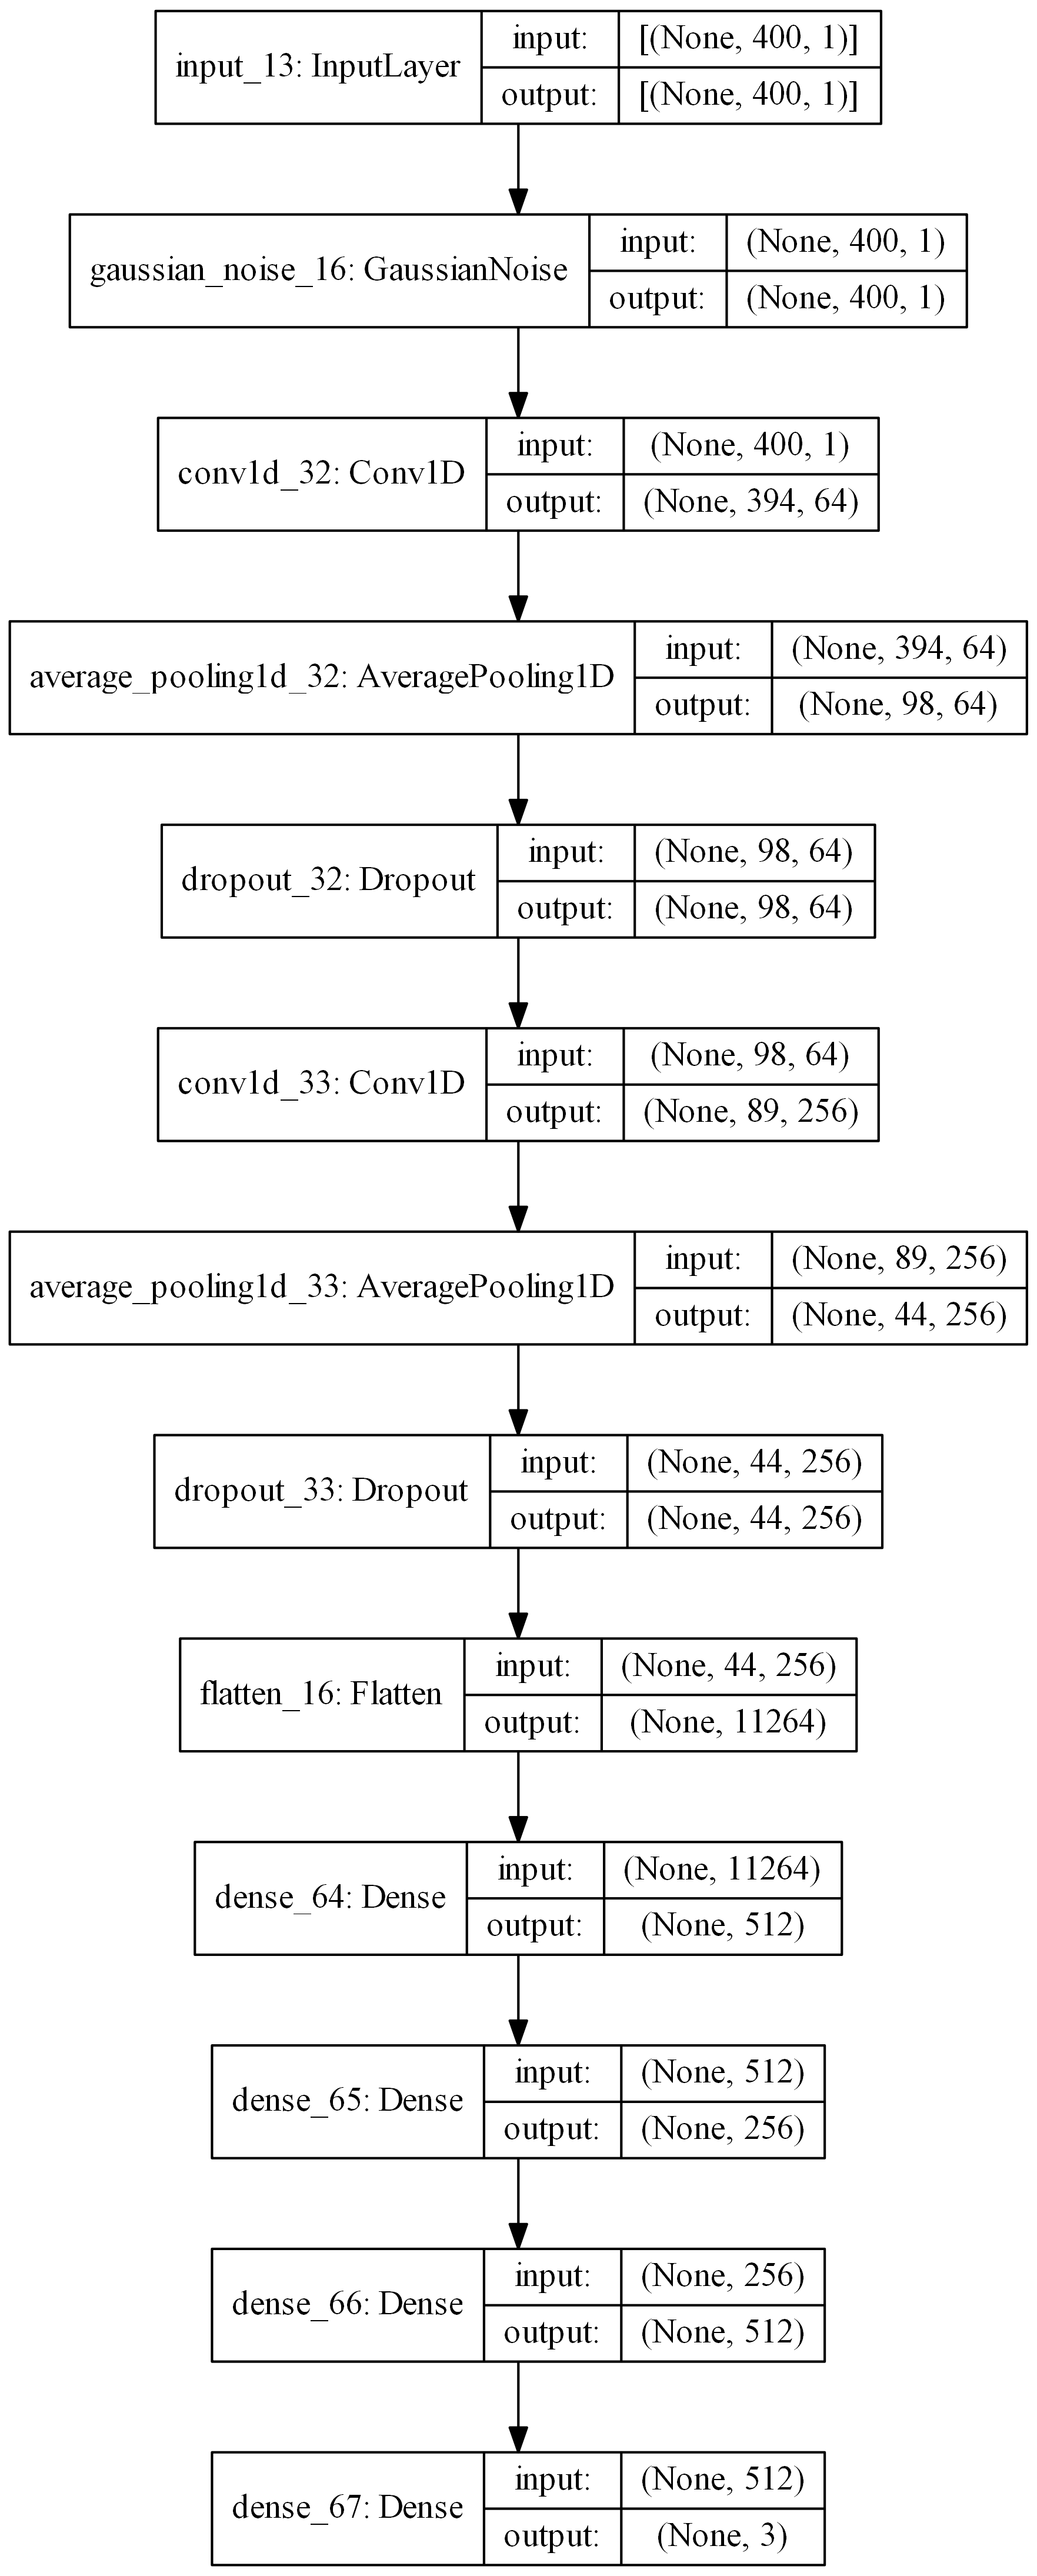

In [ ]:
tf.keras.utils.plot_model(model,to_file="{}/architecture.png".format(model_name_to_save),show_layer_names=True,dpi=300,show_shapes=True,expand_nested=True)

## train history

In [ ]:
import csv
import pathlib
from pprint import pprint
his=pd.read_csv('{}/history.csv'.format(model_name_to_load))
print("total epochs:",len(his['epoch']))
his

FileNotFoundError: [Errno 2] No such file or directory: '../logs/1D_final_case_study_Three_P2_y/history.csv'

## plot trained model history

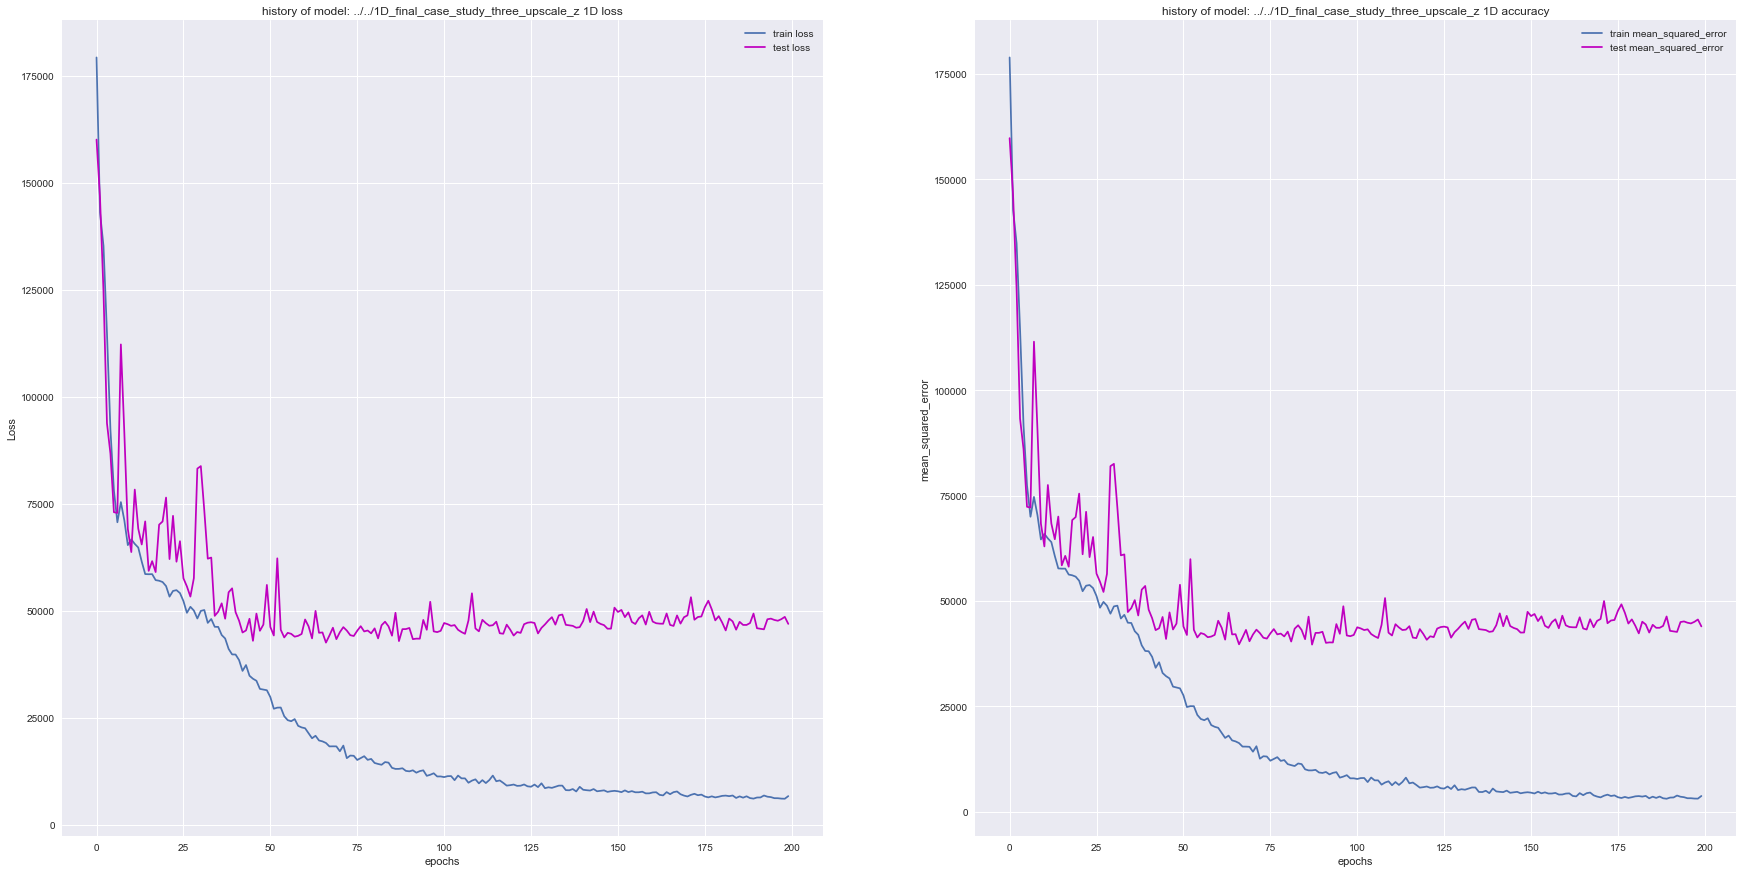

In [ ]:
plt.figure(1,figsize=(30,15))
plt.subplot(1,2,1)
plt.title("history of model: {} 1D".format(model_name_to_load)+ " loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
try:
    plt.plot(his['X_loss'][20:], label = 'X train loss')
    plt.plot(his['val_X_loss'][20:], label = 'X test loss')
    plt.plot(his['Y_loss'][20:], label = 'Y train loss')
    plt.plot(his['val_Y_loss'][20:], label = 'Y test loss')
    plt.plot(his['Z_loss'][20:], label = 'Z train loss')
    plt.plot(his['val_Z_loss'][20:], label = 'Z test loss')
except:
    plt.plot(his['loss'], label = 'train loss')
    plt.plot(his['val_loss'], label = 'test loss',color='m')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title("history of model: {} 1D".format(model_name_to_load)+ " accuracy")
plt.xlabel("epochs")
plt.ylabel('mean_squared_error')
try:
    plt.plot(his['X_mean_squared_error'][20:], label = 'X train mean_squared_error')
    plt.plot(his['val_X_mean_squared_error'][20:], label = 'X test mean_squared_error' )
    plt.plot(his['Y_mean_squared_error'][20:], label = 'Y train mean_squared_error')
    plt.plot(his['val_Y_mean_squared_error'][20:], label = 'Y test mean_squared_error' )
    plt.plot(his['Z_mean_squared_error'][20:], label = 'Z train mean_squared_error')
    plt.plot(his['val_Z_mean_squared_error'][20:], label = 'Z test mean_squared_error' )
except:
    plt.plot(his['mean_squared_error'], label = 'train mean_squared_error')
    plt.plot(his['val_mean_squared_error'], label = 'test mean_squared_error',color='m')
plt.grid(True)
plt.legend()
plt.savefig('{}/graph.png'.format(model_name_to_save))

# test

## normal

In [ ]:
import math
import statistics

c,c2,index=0,0,0
errors={}
validation={}
poly_space=[]

if label_name=="THREE_UPSCALE":
    Xconstant=1000
    Zconstant=500
else:
    Xconstant=500
    Zconstant=250

if label_name=="THREE_RESHAPE" or label_name=="THREE_UPSCALE":
    Yconstant=500
else:
    Yconstant=250


for i in model.predict(X_test):
    x,y,z=i
    x2,y2,z2=y_test.to_numpy()[c2]
    validation[c]=[x,y,z,index,'predict']
    c+=1
    validation[c]=[x2,y2,z2,index,'actual']
    poly_space.append(math.sqrt((x2-Xconstant)**2+(y2-Yconstant)**2+(z2-Zconstant)**2))
    c+=1
    c2+=1
    index+=1
    errors[c]=math.sqrt((x2-x)**2+(y2-y)**2+(z2-z)**2)

validation=pd.DataFrame.from_dict(validation, orient='index',columns=['x','y','z','index','kind'])
validation.to_csv("{}/prediction_per_actual.csv".format(model_name_to_save),index=False)

7/7 [==============================] - 0s 29ms/step


[102, 99, 92] [162, 336, 502]


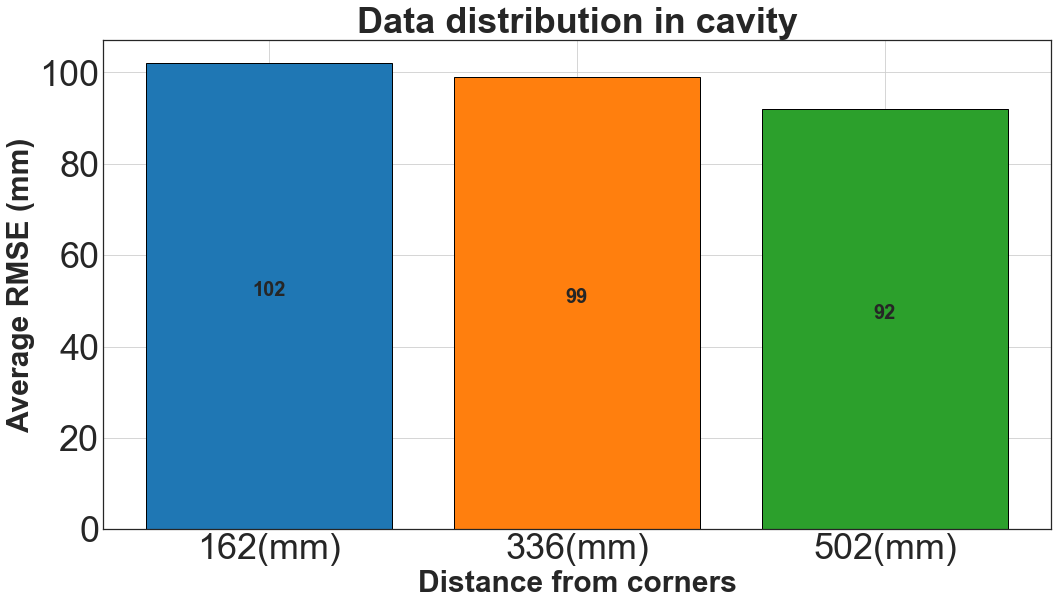

In [ ]:
plt.rc('xtick', labelsize=36)
plt.rc('ytick', labelsize=36)
plt.figure(1,figsize=(17,9))

def addlabels(x,y,text):
    for i in range(len(x)):
        plt.text(i,y[i]/2,str(round(float(text[i]))),ha = 'center',fontweight ='bold',fontsize=20)


def grouping(values,errors,classes=8):
    m=round(np.mean(values),2)
    sd=round(statistics.stdev(values),2)
    maximum=round(np.max(values),2)
    minimum=round(np.min(values),2)

    step=(maximum-minimum)/classes
    a,row=0,0
    l,clasifynumbers,clasifyerrors=[],{},{}
    for i in range(classes):
        l.append([a,round(a+step)])
        a=step+a
        clasifynumbers[row]=[]
        clasifyerrors[row]=[]
        row+=1
    for ii,i in enumerate(values):
        row=0
        for j in l:
            if (i>=j[0] and i<=j[1]):
                clasifynumbers[row].append(i)
                clasifyerrors[row].append(errors[ii])
                break
            row+=1
    mean,error_mean=[],[]
    for i in range(classes):
        mean.append(round(np.max(clasifynumbers[i])))
        error_mean.append(round(np.mean(clasifyerrors[i])))
    return mean,error_mean

groups={}
groups['POLY_MEAN'],groups['RMSE_MEAN']=grouping(poly_space,list(errors.values()),classes=3)
print(groups['RMSE_MEAN'],groups['POLY_MEAN'])


labels=['Corner','Middle','Centre']

plt.title("Data distribution in cavity",fontweight ='bold',fontsize=36)
for i in range(len(groups['RMSE_MEAN'])):
    #plt.bar(labels[i]+' '+str(groups['POLY_MEAN'][i])+'(mm)',groups['RMSE_MEAN'][i],label=labels[i],edgecolor='black')
    plt.bar(str(groups['POLY_MEAN'][i])+'(mm)',groups['RMSE_MEAN'][i],label=labels[i],edgecolor='black')
addlabels(labels,groups['RMSE_MEAN'],groups['RMSE_MEAN'])
plt.ylabel("Average RMSE (mm)",fontweight ='bold',fontsize=30)
plt.xlabel("Distance from corners",fontweight ='bold',fontsize=30)

plt.grid()

plt.savefig('{}/Euclidean_distance.png'.format(model_name_to_save),dpi=300)

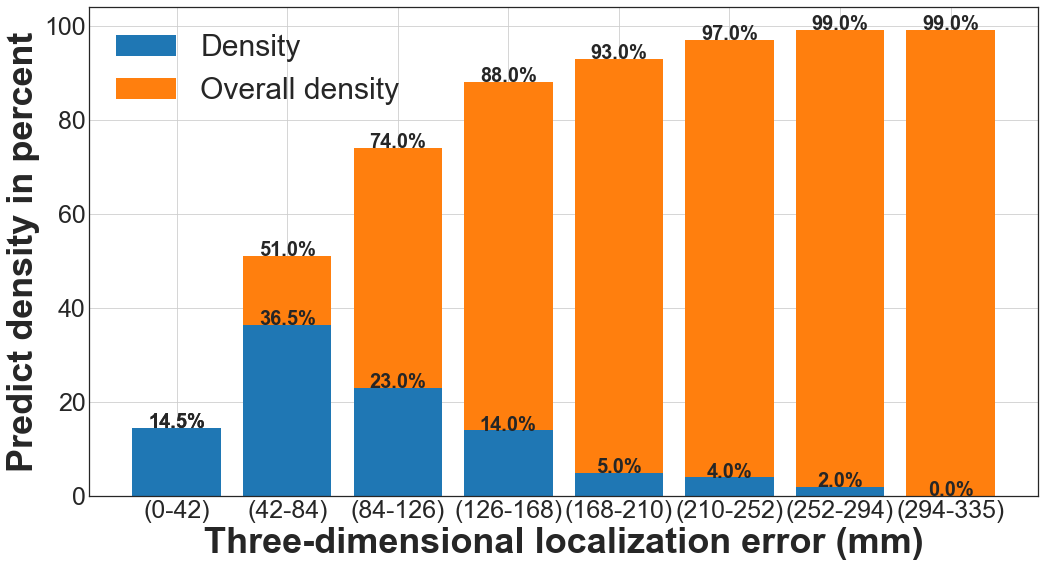

In [ ]:
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.figure(1,figsize=(17,9))

def addlabels(x,y,text):
    for i in range(len(x)):
        plt.text(i,y[i],str(round(float(text[i]),1))+'%',ha = 'center',fontweight ='bold',fontsize=20)

def grouping(values,classes=8):
    m=round(np.mean(values),2)
    sd=round(statistics.stdev(values),2)
    maximum=round(np.max(values),2)
    minimum=round(np.min(values),2)

    step=(maximum-minimum)/classes
    a,row=0,0
    l,clasifynumbers=[],{}
    for i in range(classes):
        l.append([a,round(a+step)])
        a=step+a
        clasifynumbers[row]=[]
        row+=1
    for i in values:
        row=0
        for j in l:
            if (i>=j[0] and i<=j[1]):
                clasifynumbers[row].append(i)
                break
            row+=1
    variety=[]
    for i in range(classes):
        l[i]=str(round(l[i][0]+step))
        variety.append((len(clasifynumbers[i])/len(values))*100)

    return l,variety

values=list(errors.values())
m=round(np.mean(values),2)
sd=round(statistics.stdev(values),2)
maximum=round(np.max(values),2)
minimum=round(np.min(values),2)
# plt.title("RMSE Mean :{} Standard deviation :{} Max :{} Min :{}".format(m,sd,maximum,minimum),fontweight ='bold',fontsize=28)
# plt.hist(values, density=True)
groups['RMSE'],groups['variety']=grouping(list(errors.values()),classes=8)
Groups=[]
for i in range(len(groups['RMSE'])):
    if i==0:
        Groups.append('('+str(0)+'-'+groups['RMSE'][i]+')')
    else:
        Groups.append('('+groups['RMSE'][i-1]+'-'+groups['RMSE'][i]+')')
plt.bar(Groups,groups['variety'],label='Density')
t=groups['variety'].copy()
for i,v in enumerate(groups['variety']):
    v=round(v,2)
    if i==0:
        t[i]=v
    else:
        t[i]=v+t[i-1]

addlabels(Groups,groups['variety'],groups['variety'])
plt.bar(Groups,np.array(t)-np.array(groups['variety']),bottom=groups['variety'],label='Overall density')
addlabels(Groups,t,t)
plt.grid()
plt.legend(prop = { "size": 30 })
plt.ylabel("Predict density in percent",fontweight ='bold',fontsize=36)
plt.xlabel("Three-dimensional localization error (mm)",fontweight ='bold',fontsize=36)

plt.savefig('{}/losses.png'.format(model_name_to_save),dpi=500)

In [ ]:
validation[0:10]

x           y           z  index     kind
0  860.489990  168.492477  416.776123      0  predict
1  838.543891  149.160159  422.456895      0   actual
2  360.774841  157.314117  237.901764      1  predict
3  370.454913  133.278131  218.260035      1   actual
4  732.142944  119.038208  187.873016      2  predict
5  734.357623  105.609511  184.743531      2   actual
6  138.164917    3.841484  -26.243000      3  predict
7  167.919941  -25.603864   26.022365      3   actual
8  566.474670  130.495270  335.135315      4  predict
9  497.680160   88.135383  346.873091      4   actual

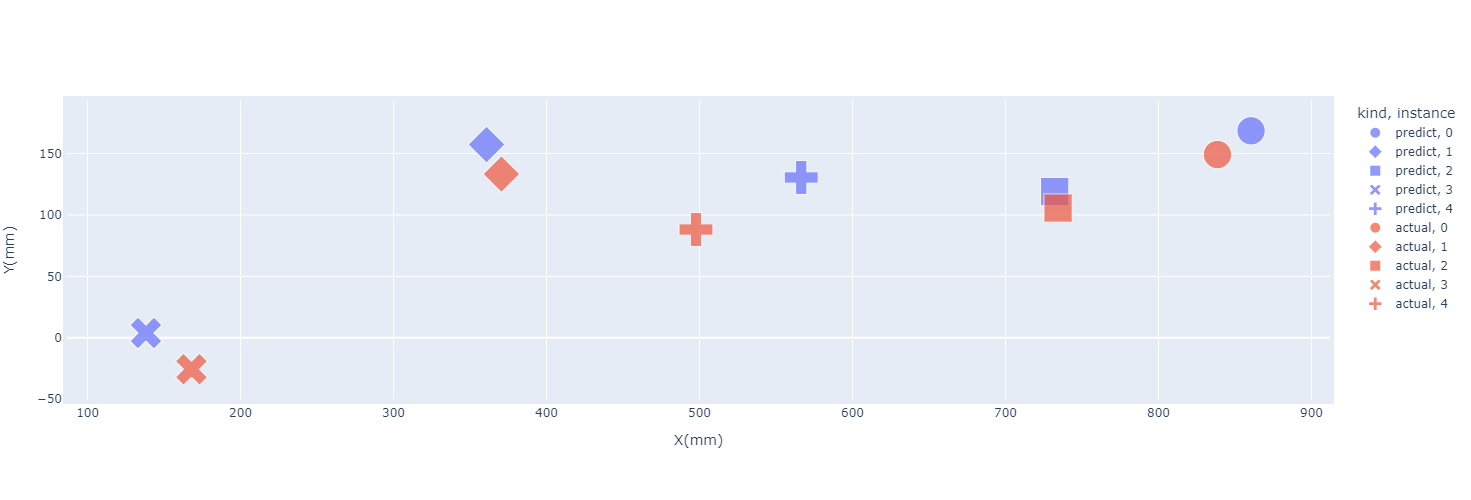

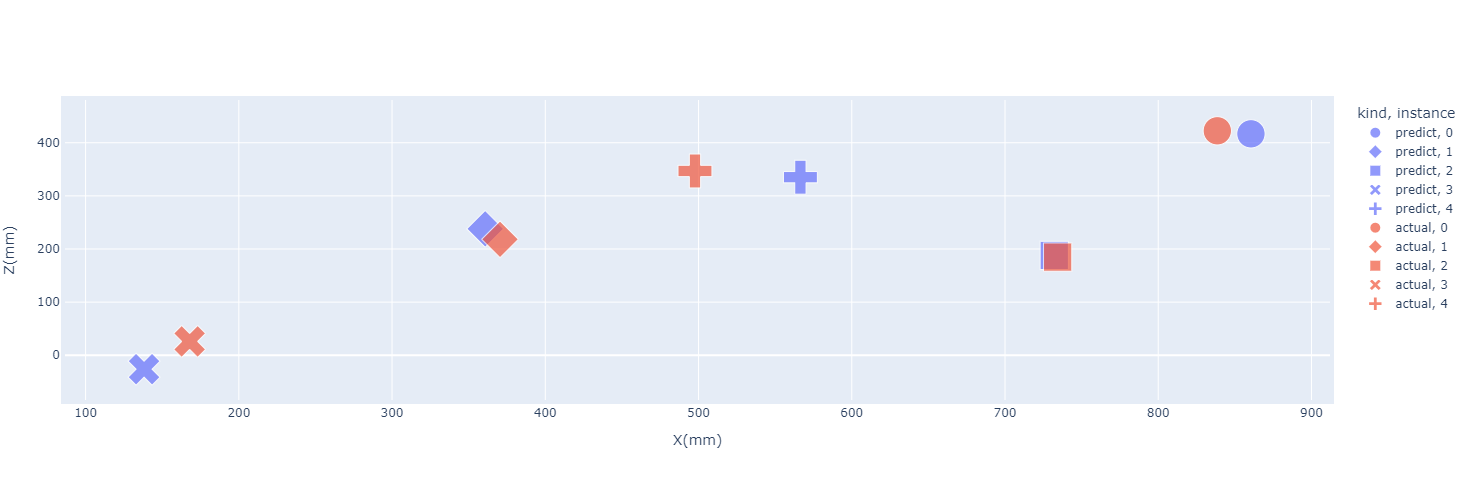

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


fig=px.scatter(data_frame = validation[0:10]
            ,x = 'x'
            ,y = 'y'
            ,color = 'kind'
            ,symbol="index"
            ,size=[10,10,10,10,10,10,10,10,10,10]
            ,labels={
                     "x": "X(mm)",
                     "y": "Y(mm)",
                     "kind": "kind",
                     "index":"instance"
                 },
           )
fig.update_layout(
    autosize=True,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
)

fig.show()
fig.write_image("{}/YX.png".format(model_name_to_save))
fig=px.scatter(data_frame = validation[0:10]
            ,x = 'x'
            ,y = 'z'
            ,color = 'kind'
            ,symbol="index"
            ,size=[10,10,10,10,10,10,10,10,10,10]
            ,labels={
                     "x": "X(mm)",
                     "z": "Z(mm)",
                     "kind": "kind",
                     "index":"instance"
                 },
           )
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="white",
)
fig.show()
fig.write_image("{}/ZX.png".format(model_name_to_save))

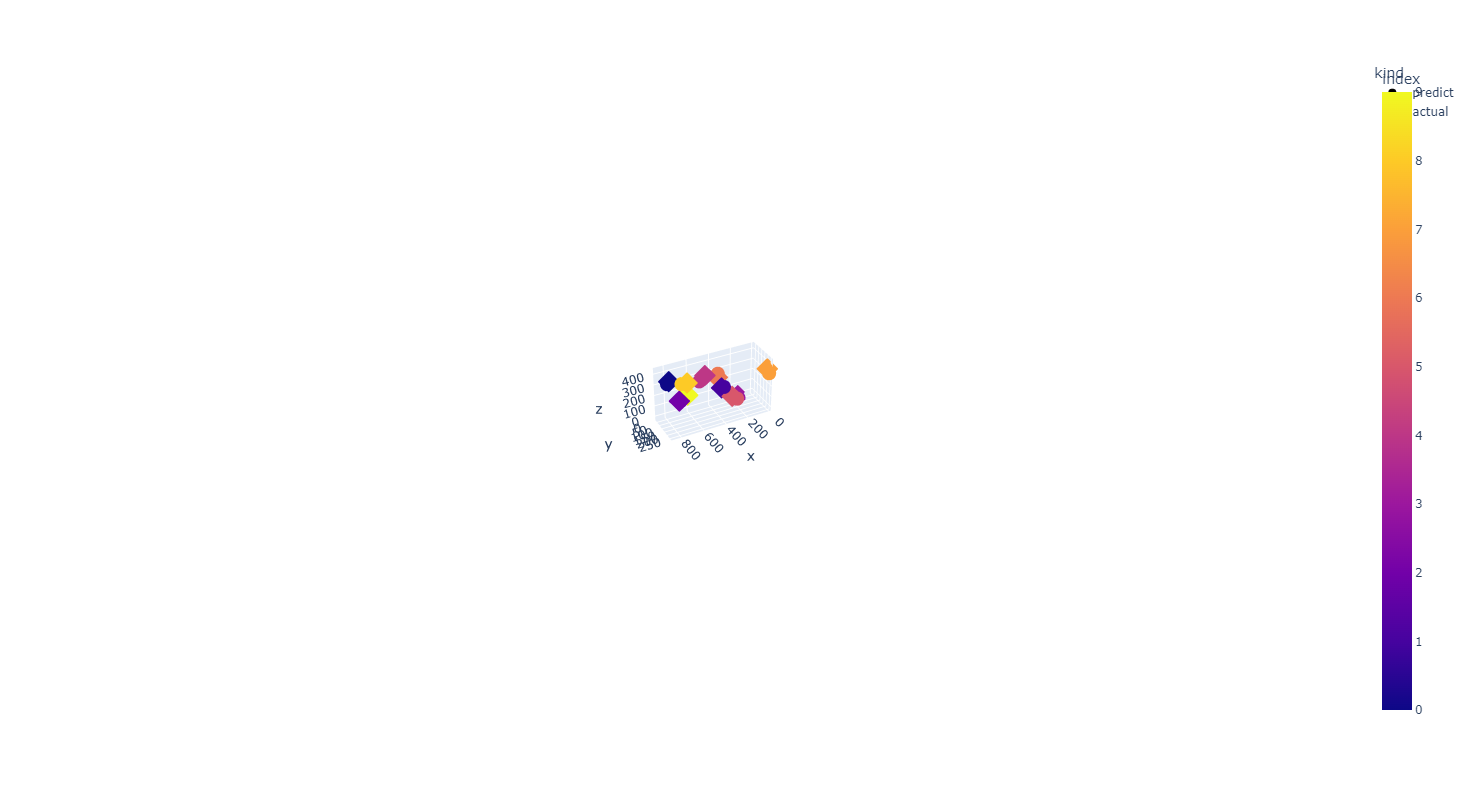

In [ ]:
import plotly.express as px
fig = px.scatter_3d(validation[0:20],x="x", y="y", z="z",color='index', symbol='kind')
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()